In [119]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [120]:
x = torch.from_numpy(np.arange(1, 7, 1).reshape(3, 2))
x

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [121]:
intermed = torch.matmul(x.T,x)
intermed

tensor([[35, 44],
        [44, 56]])

In [122]:
torch.matmul(intermed, x.T)

tensor([[123, 281, 439],
        [156, 356, 556]])

In [123]:
time = np.arange(20)
speed = np.arange(20) + 5
model = np.poly1d(np.polyfit(time, speed, 2))
model


poly1d([-2.66900469e-17,  1.00000000e+00,  5.00000000e+00])

# Autograd Quadratic

tensor(16., dtype=torch.float64)
tensor(8.0388, dtype=torch.float64)
tensor(7.5435, dtype=torch.float64)
tensor(7.5093, dtype=torch.float64)
tensor(7.5052, dtype=torch.float64)
tensor(7.5033, dtype=torch.float64)
tensor(7.5015, dtype=torch.float64)
tensor(7.4998, dtype=torch.float64)
tensor(7.4981, dtype=torch.float64)
tensor(7.4964, dtype=torch.float64)
tensor(7.4947, dtype=torch.float64)
tensor(7.4930, dtype=torch.float64)
tensor(7.4914, dtype=torch.float64)
tensor(7.4898, dtype=torch.float64)
tensor(7.4881, dtype=torch.float64)
tensor(7.4866, dtype=torch.float64)
tensor(7.4850, dtype=torch.float64)
tensor(7.4834, dtype=torch.float64)
tensor(7.4819, dtype=torch.float64)
tensor(7.4803, dtype=torch.float64)
tensor(7.4788, dtype=torch.float64)
tensor(7.4773, dtype=torch.float64)
tensor(7.4758, dtype=torch.float64)
tensor(7.4744, dtype=torch.float64)
tensor(7.4729, dtype=torch.float64)
tensor(7.4715, dtype=torch.float64)
tensor(7.4701, dtype=torch.float64)
tensor(7.4687, dtype=torch.floa

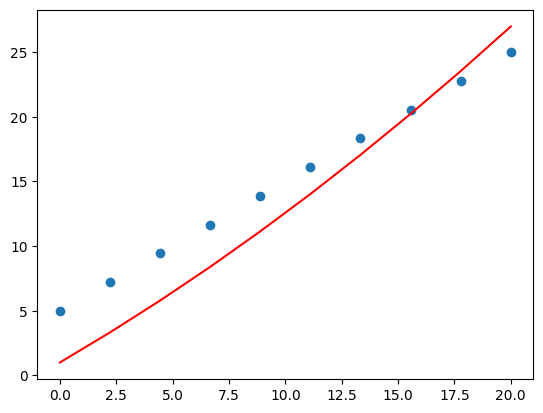

In [124]:
class LinearModel:
    def __init__(self, a=0, b=0, c=0):
        self.a = torch.Tensor([a])
        self.b = torch.Tensor([b])
        self.c = torch.Tensor([c])
        self.a.requires_grad = True
        self.b.requires_grad = True
        self.c.requires_grad = True
        self.params = [self.a, self.b, self.c]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.a * time ** 2 + self.b * time + self.c
        self.loss = torch.mean((self.out - speed) ** 2)
        self.loss.backward()
    
    def step(self, lr):
        with torch.no_grad():
            self.a -= lr * self.a.grad
            self.b -= lr * self.b.grad
            self.c -= lr * self.c.grad
            for param in self.params:
                param.grad.zero_()

n = 10
time = torch.from_numpy(np.linspace(0, 20, n)) # x
speed = torch.from_numpy(np.linspace(5, 25, n)) # y = 0x^2 + 1x + 5
model = LinearModel(a=0, b=1, c=1)
lr = 1e-5
for i in range(1000):
    model.compute(time, speed)
    print(model.loss.data)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(lr)
    lr *= 0.99

print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

tensor(265.7407, dtype=torch.float64)
tensor(36281.9351, dtype=torch.float64)
tensor(2419.6871, dtype=torch.float64)
tensor(8080.5776, dtype=torch.float64)
tensor(20614.9426, dtype=torch.float64)
tensor(14273.5742, dtype=torch.float64)
tensor(3120.6006, dtype=torch.float64)
tensor(390.3207, dtype=torch.float64)
tensor(6100.5147, dtype=torch.float64)
tensor(10531.2948, dtype=torch.float64)
tensor(8337.2741, dtype=torch.float64)
tensor(2952.2185, dtype=torch.float64)
tensor(54.0398, dtype=torch.float64)
tensor(1657.7642, dtype=torch.float64)
tensor(4838.5366, dtype=torch.float64)
tensor(5637.4350, dtype=torch.float64)
tensor(3436.5900, dtype=torch.float64)
tensor(754.9277, dtype=torch.float64)
tensor(105.3813, dtype=torch.float64)
tensor(1566.7592, dtype=torch.float64)
tensor(3070.2723, dtype=torch.float64)
tensor(2886.4035, dtype=torch.float64)
tensor(1352.1602, dtype=torch.float64)
tensor(127.7471, dtype=torch.float64)
tensor(287.6423, dtype=torch.float64)
tensor(1307.7224, dtype=torch

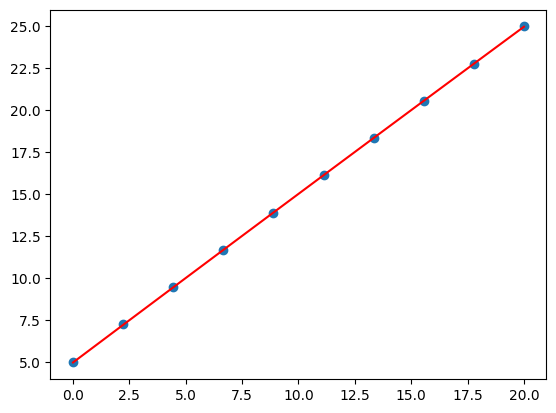

In [126]:

class LinearModel:
    def __init__(self, a=0, b=0, c=0):
        self.a = torch.Tensor([a])
        self.b = torch.Tensor([b])
        self.c = torch.Tensor([c])
        self.a.requires_grad = True
        self.b.requires_grad = True
        self.c.requires_grad = True
        self.params = [self.a, self.b, self.c]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.a * time ** 2 + self.b * time + self.c
        self.loss = torch.mean((self.out - speed) ** 2)
    
    def step(self, optimizer):
        optimizer.zero_grad()
        self.loss.backward()
        optimizer.step()

model = LinearModel(a=0, b=0, c=0)
optimizer = torch.optim.Adam(model.params, lr=1)

for i in range(500):
    model.compute(time, speed)
    model.step(optimizer)
    print(model.loss.data)

print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

tensor(246., dtype=torch.float64)
tensor(122.6896, dtype=torch.float64)
tensor(62.9907, dtype=torch.float64)
tensor(33.8375, dtype=torch.float64)
tensor(19.4782, dtype=torch.float64)
tensor(12.3448, dtype=torch.float64)
tensor(8.7702, dtype=torch.float64)
tensor(6.9629, dtype=torch.float64)
tensor(6.0403, dtype=torch.float64)
tensor(5.5641, dtype=torch.float64)
tensor(5.3152, dtype=torch.float64)
tensor(5.1826, dtype=torch.float64)
tensor(5.1103, dtype=torch.float64)
tensor(5.0692, dtype=torch.float64)
tensor(5.0447, dtype=torch.float64)
tensor(5.0289, dtype=torch.float64)
tensor(5.0177, dtype=torch.float64)
tensor(5.0091, dtype=torch.float64)
tensor(5.0019, dtype=torch.float64)
tensor(4.9955, dtype=torch.float64)
tensor(4.9895, dtype=torch.float64)
tensor(4.9838, dtype=torch.float64)
tensor(4.9783, dtype=torch.float64)
tensor(4.9729, dtype=torch.float64)
tensor(4.9676, dtype=torch.float64)
tensor(4.9624, dtype=torch.float64)
tensor(4.9573, dtype=torch.float64)
tensor(4.9522, dtype=tor

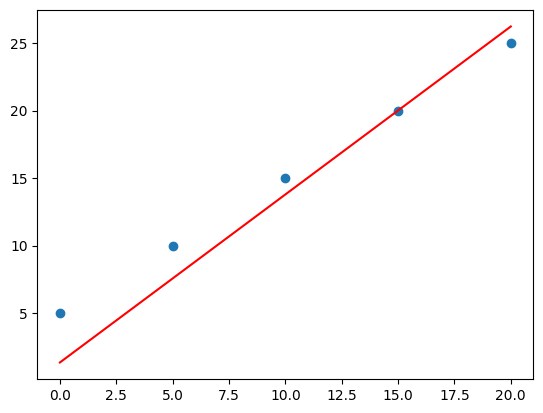

In [137]:
class LinearModel:
    def __init__(self, m=0, b=0):
        self.m = torch.Tensor([m])
        self.b = torch.Tensor([b])
        self.m.requires_grad = True
        self.b.requires_grad = True
        self.params = [self.m, self.b]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.m * time + self.b
        self.loss = torch.mean((self.out - speed) ** 2)
        self.loss.backward()
    
    def step(self, lr):
        with torch.no_grad():
            self.m -= lr * self.m.grad
            self.b -= lr * self.b.grad
            for param in self.params:
                param.grad.zero_()

n = 5
time = torch.from_numpy(np.linspace(0, 20, n)) # x
speed = torch.from_numpy(np.linspace(5, 25, n)) # y = 0x^2 + 1x + 5
model = LinearModel(m=0, b=1)
lr = 1e-3
for i in range(100):
    model.compute(time, speed)
    print(model.loss.data)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(lr)
    lr *= 0.99

print("m=", model.m.data, "b=", model.b.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')